# For prepping YASA and sleep data to view in Brainwave Viz
Much of this has been moved into run_feature_pipeline.py now.

In [344]:
%reload_ext autoreload
%autoreload 2


In [345]:
import numpy as np
import pandas as pd
import run_yasa
import logging
import mne
import yasa
import os
import argparse
import os

import mne
import numpy as np
import pandas as pd
from brainflow.board_shim import BoardShim, BoardIds
from brainflow.data_filter import DataFilter


In [346]:
log = lambda msg: logging.info(msg)


## Data source

In [494]:
# Manual wakings - must be adjusted
from datetime import datetime, timedelta

input_file = "C:\\dev\\play\\brainwave-data\\2024-09-01-21-11-15\\raw.fif"
# day_and_night_of = "2024-07-15"

# day_and_night_of_date = datetime.strptime(day_and_night_of, "%Y-%m-%d")
# next_day = day_and_night_of_date + timedelta(days=1)

waking_start_time = None # next_day.replace(hour=0, minute=9)
waking_end_time = None # next_day.replace(hour=1, minute=19)

uk_timezone = pytz.timezone("Europe/London")

waking_start_time_tz = None # uk_timezone.localize(waking_start_time)
waking_end_time_tz = None # uk_timezone.localize(waking_end_time)

Opening raw data file C:\dev\play\brainwave-data\2024-07-15-22-33-27\raw.fif...
Isotrak not found
    Range : 0 ... 7133646 =      0.000 ... 28534.584 secs
Ready.
Reading 0 ... 7133646  =      0.000 ... 28534.584 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2751 samples (11.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin

C:\dev\play\brainwave-processor\convert.py:76: RuntimeWarning: EDF format requires equal-length data blocks, so 0.41 seconds of zeros were appended to all channels when writing the final block.
  parser = argparse.ArgumentParser()
C:\dev\play\brainwave-processor\sleep_events.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\dev\play\brainwave-processor\sleep_events.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\dev\play\brainwave-processor\run_yasa.py:84: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=False).savefig(input_file_without_ext + '.pre_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\run_yasa.py:84: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(average=False).savefig(input_file_without_ext + '.pre_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2751 samples (11.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

NOTE: plot_psd() is

C:\dev\play\brainwave-processor\run_yasa.py:87: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  filtered.plot_psd(average=False).savefig(input_file_without_ext + '.post_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\run_yasa.py:87: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd(average=False).savefig(input_file_without_ext + '.post_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\dev\play\brainwave-processor\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake,ProbablySleep
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,4.345698,0.009705,-0.817971,-0.825423,0.000000,0.000000,False,False,False,False
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,62.117203,0.007471,-0.817738,-0.831929,0.008333,0.001053,True,False,True,False
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,57.976131,0.026561,-0.809946,-0.797026,0.016667,0.002105,True,False,True,False
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,43.481384,0.103029,-0.794672,-0.668199,0.025000,0.003158,True,False,True,False
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,42.966190,0.015595,-0.790862,-0.659620,0.033333,0.004211,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,-0.042598,0.144683,-0.437334,-0.217451,7.883333,0.995789,True,False,True,False
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,-0.042969,0.109254,-0.450300,-0.206426,7.891667,0.996842,True,False,True,False
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,0.036510,0.008459,-0.470806,-0.331214,7.900000,0.997895,True,False,True,False


# Load MNE data

In [671]:
import run_feature_pipeline

In [674]:
raw, input_file_without_ext, mne_filtered = run_feature_pipeline.load_mne_file(log, input_file)


Opening raw data file C:\dev\play\brainwave-data\2024-07-15-22-33-27\raw.fif...
Isotrak not found
    Range : 0 ... 7133646 =      0.000 ... 28534.584 secs
Ready.
Reading 0 ... 7133646  =      0.000 ... 28534.584 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2751 samples (11.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin

In [675]:
from datetime import datetime, timedelta

channels = raw.info['ch_names']
sfreq = raw.info['sfreq']
start_date = raw.info['meas_date']
end_date = start_date + timedelta(seconds=float(raw.times[-1]))

display(channels)
display(sfreq)
display(start_date)
display(input_file_without_ext)
display(raw.n_times)
display(raw.times[0])
display(raw.times[-1])
display(end_date)


['F8-M1', 'T4-M1', 'O2-M1']

250.0

datetime.datetime(2024, 7, 15, 21, 33, 29, 966742, tzinfo=datetime.timezone.utc)

'C:\\dev\\play\\brainwave-data\\2024-07-15-22-33-27\\raw'

7133647

0.0

28534.584

datetime.datetime(2024, 7, 16, 5, 29, 4, 550742, tzinfo=datetime.timezone.utc)

In [500]:
## Save to EDF


In [676]:
import convert
convert.save_mne_as_downsample_edf(log, mne_filtered, input_file_without_ext)


Overwriting existing file.


C:\dev\play\brainwave-processor\convert.py:73: RuntimeWarning: EDF format requires equal-length data blocks, so 0.41 seconds of zeros were appended to all channels when writing the final block.
  mne.export.export_raw(input_file_without_ext + ".edf", resampled, overwrite=True)


## Load sleep events

In [686]:
import sleep_events
ha_events = sleep_events.load_sleep_events(log, start_date, end_date, waking_start_time_tz, waking_end_time_tz)   

C:\dev\play\brainwave-processor\sleep_events.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\dev\play\brainwave-processor\sleep_events.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [687]:
output_csv_file = input_file_without_ext + ".night_events.csv"
ha_events.to_csv(output_csv_file, index=False)

In [688]:
ha_events

,event,timestamp_uk,source,duration_secs,timestamp_uk_str
459,wake,2024-07-16 06:24:30.207000+01:00,night_event_buttons,1,2024-07-16 06:24:30+0100


## Fitbit
Flawed approach here - should get directly from Fitbit.  But means Oauth...

In [520]:
# doc_ref = db.collection('nightsExperimental').document(day_and_night_of)
# doc = doc_ref.get()
# records = doc.to_dict()
# records


{'dayAndNightOf': '2024-07-15',
 'aggregated': {'wakeTime': DatetimeWithNanoseconds(2024, 7, 16, 5, 0, tzinfo=datetime.timezone.utc),
  'timeAwakeAfterSleepMillis': 570000,
  'deepSleepMillis': 3540000,
  'betweenReadyToSleepAndAsleepMillis': 1560000,
  'awakeAfterSleepMillis': 600000,
  'remSleepMillis': 5040000,
  'lightSleepMillis': 14580000,
  'hypnogram': [{'startTime': DatetimeWithNanoseconds(2024, 7, 15, 22, 26, tzinfo=datetime.timezone.utc),
    'state': 'light',
    'endTime': DatetimeWithNanoseconds(2024, 7, 15, 22, 32, tzinfo=datetime.timezone.utc)},
   {'startTime': DatetimeWithNanoseconds(2024, 7, 15, 22, 32, tzinfo=datetime.timezone.utc),
    'state': 'deep',
    'endTime': DatetimeWithNanoseconds(2024, 7, 15, 23, 22, tzinfo=datetime.timezone.utc)},
   {'startTime': DatetimeWithNanoseconds(2024, 7, 15, 23, 22, tzinfo=datetime.timezone.utc),
    'state': 'light',
    'endTime': DatetimeWithNanoseconds(2024, 7, 16, 0, 45, 30, tzinfo=datetime.timezone.utc)},
   {'startTime':

In [522]:
# fitbit_hypno = records['fitbit']['source']['hypnogram']
# fitbit_hypno

KeyError: 'fitbit'

In [523]:
# fitbit_hypno_df = pd.DataFrame(fitbit_hypno)
# fitbit_hypno_df

,startTime,state,endTime
0,2024-08-27 01:14:00+00:00,wake,2024-08-27 01:14:30+00:00
1,2024-08-27 01:14:30+00:00,light,2024-08-27 02:00:30+00:00
2,2024-08-27 02:00:30+00:00,deep,2024-08-27 02:12:30+00:00
3,2024-08-27 02:12:30+00:00,wake,2024-08-27 02:20:00+00:00
4,2024-08-27 02:20:00+00:00,light,2024-08-27 02:24:00+00:00
5,2024-08-27 02:24:00+00:00,rem,2024-08-27 03:09:00+00:00
6,2024-08-27 03:09:00+00:00,light,2024-08-27 03:20:30+00:00
7,2024-08-27 03:20:30+00:00,rem,2024-08-27 03:25:30+00:00
8,2024-08-27 03:25:30+00:00,light,2024-08-27 04:27:00+00:00
9,2024-08-27 04:27:00+00:00,rem,2024-08-27 04:38:30+00:00


In [52]:
# output_csv_file = input_file_without_ext + ".fitbit_hypnogram.csv"
# fitbit_hypno_df.to_csv(output_csv_file, index=False)

## YASA Epoch Data
This is all the data YASA extracts for its automatic sleep staging.

In [679]:
import yasa_features

yasa_feats, channel_feats_dict = yasa_features.extract_yasa_features(log, channels, mne_filtered)

In [615]:
yasa_feats

,F8-M1_eeg_abspow,F8-M1_eeg_abspow_c7min_norm,F8-M1_eeg_abspow_p2min_norm,F8-M1_eeg_alpha,F8-M1_eeg_alpha_c7min_norm,F8-M1_eeg_alpha_p2min_norm,F8-M1_eeg_at,F8-M1_eeg_at_c7min_norm,F8-M1_eeg_at_p2min_norm,F8-M1_eeg_beta,...,O2-M1_eeg_skew_c7min_norm,O2-M1_eeg_skew_p2min_norm,O2-M1_eeg_std,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,820120.312500,91.470352,529.796814,0.004372,-0.655214,-0.643855,0.885576,-0.475552,0.401806,0.000754,...,0.910715,0.579733,943.354675,55.290474,4.345698,0.009705,-0.817971,-0.825423,0.000000,0.000000
1,2952.422363,67.792419,265.810699,0.011687,-0.653972,-0.613079,0.137035,-0.542195,-0.162061,0.012413,...,0.850677,1.607823,25615.820312,53.044174,62.117203,0.007471,-0.817738,-0.831929,0.008333,0.001053
2,1958.182373,51.726696,177.601227,0.013320,-0.648707,-0.598241,0.180911,-0.579220,-0.327982,0.016530,...,0.649354,1.035750,10626.797852,44.263306,57.976131,0.026561,-0.809946,-0.797026,0.016667,0.002105
3,886.877502,39.860161,133.323425,0.020822,-0.639742,-0.575042,0.188796,-0.599079,-0.407973,0.015232,...,0.499553,0.816604,14.785846,34.999359,43.481384,0.103029,-0.794672,-0.668199,0.025000,0.003158
4,25455.003906,30.512751,4.965119,0.002083,-0.633219,-0.579858,0.195232,-0.612727,-0.667987,0.003008,...,0.369591,0.429554,503.306213,27.776756,42.966190,0.015595,-0.790862,-0.659620,0.033333,0.004211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,218.876770,0.203925,0.058962,0.028945,-0.523143,-0.390411,0.336910,-0.373104,-0.319340,0.043745,...,-0.109579,-0.137469,5.762788,0.357482,-0.042598,0.144683,-0.437334,-0.217451,7.883333,0.995789
947,387.190674,0.172371,0.078911,0.016185,-0.519397,-0.422645,0.251777,-0.355987,-0.352118,0.023514,...,-0.116025,-0.151613,6.249229,0.286071,-0.042969,0.109254,-0.450300,-0.206426,7.891667,0.996842
948,974.700806,0.151245,0.203074,0.010964,-0.515152,-0.479694,0.368412,-0.331752,-0.367538,0.019247,...,-0.119325,-0.122852,74.657379,0.210416,0.036510,0.008459,-0.470806,-0.331214,7.900000,0.997895


## YASA Slow Waves

In [529]:
from yasa import sw_detect

sw = sw_detect(mne_filtered, sfreq)
sw


In [530]:
sw_summary = sw.summary()
sw_summary

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Channel,IdxChannel
0,37.836,38.108,38.360,38.536,38.776,0.940,-53.370251,26.281915,79.652166,316.080024,1.063830,F8-M1,0
1,45.744,45.980,46.220,46.412,47.132,1.388,-60.028126,36.161894,96.190020,400.791749,0.720461,F8-M1,0
2,50.192,50.404,50.624,50.776,50.924,0.732,-168.375252,87.080962,255.456214,1161.164608,1.366120,F8-M1,0
3,66.880,67.080,67.328,67.452,67.576,0.696,-112.393261,30.491320,142.884581,576.147504,1.436782,F8-M1,0
4,67.576,67.824,68.132,68.252,68.448,0.872,-74.626229,10.664604,85.290833,276.918288,1.146789,F8-M1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,25009.668,25009.896,25010.092,25010.292,25010.492,0.824,-78.051416,83.130160,161.181576,822.354981,1.213592,O2-M1,2
1371,25166.184,25166.440,25166.744,25166.976,25167.312,1.128,-65.997766,32.781162,98.778929,324.930687,0.886525,O2-M1,2
1372,25277.020,25277.760,25278.012,25278.312,25278.624,1.604,-43.441531,74.693572,118.135103,468.790090,0.623441,O2-M1,2
1373,27377.080,27378.048,27378.552,27378.844,27379.180,2.100,-76.530726,21.956701,98.487427,195.411561,0.476190,O2-M1,2


In [531]:
output_csv_file = input_file_without_ext + ".sw_summary.csv"
sw_summary.to_csv(output_csv_file, index=False)

## YASA Spindles

In [532]:
from yasa import sw_detect, spindles_detect

sp = spindles_detect(mne_filtered, sfreq)
sp


In [533]:
sp_summary = sp.summary()
sp_summary

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,2786.464,2786.680,2787.036,0.572,22.818504,5.268522,1.287856,0.245014,13.310458,7.0,0.375000,F8-M1,0
1,6845.516,6845.872,6846.100,0.584,42.405269,10.401758,2.074649,0.319408,12.360125,7.0,0.605442,F8-M1,0
2,6881.772,6882.116,6882.392,0.620,35.152585,7.952102,1.744863,0.239373,12.108432,8.0,0.551282,F8-M1,0
3,6913.628,6914.024,6914.656,1.028,28.708770,6.011748,1.416081,0.301376,12.400951,13.0,0.383721,F8-M1,0
4,6993.380,6993.844,6993.960,0.580,39.016313,9.675157,1.864939,0.337821,12.166421,7.0,0.794521,F8-M1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,25140.456,25140.676,25141.216,0.760,31.050927,7.715345,1.651412,0.375651,13.627995,10.0,0.287958,O2-M1,2
519,25163.576,25163.872,25164.084,0.508,32.942852,7.049064,1.831337,0.399565,13.067983,6.0,0.578125,O2-M1,2
520,25202.704,25202.792,25203.376,0.672,34.130325,7.475122,1.647986,0.457396,13.590560,8.0,0.130178,O2-M1,2
521,25974.872,25975.012,25975.480,0.608,28.228483,5.352248,1.558758,0.421661,12.793700,7.0,0.228758,O2-M1,2


In [534]:
output_csv_file = input_file_without_ext + ".spindle_summary.csv"
sp_summary.to_csv(output_csv_file, index=False)

## Run YASA

In [535]:
df, json_out = run_yasa.run_yasa_report(log, input_file_without_ext, raw, True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\dev\play\brainwave-processor\run_yasa.py:84: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=False).savefig(input_file_without_ext + '.pre_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\run_yasa.py:84: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(average=False).savefig(input_file_without_ext + '.pre_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 2751 samples (11.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

NOTE: plot_psd() is

C:\dev\play\brainwave-processor\run_yasa.py:87: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  filtered.plot_psd(average=False).savefig(input_file_without_ext + '.post_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\run_yasa.py:87: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd(average=False).savefig(input_file_without_ext + '.post_filter_psd_plot.png', dpi=300)
C:\dev\play\brainwave-processor\venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\dev\play\brainwave-processor\venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit

In [536]:
yasa_copy = df.copy()
yasa_copy

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,O2-M1_Confidence,StageInt
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,0.999774,0
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,0.999920,0
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,0.999795,0
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,0.999629,0
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,0.999887,0
...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,0.975588,0
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,0.959715,0
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,0.988273,0
949,W,0.993966,949,2024-07-16 06:27:59.966742039+01:00,T4-M1,W,0.985645,W,0.993966,W,0.992614,0


## Combine epochs and YASA features

In [642]:
df = yasa_copy.copy()

In [643]:
df['epoch'] = df['Epoch']
df.set_index('epoch', inplace=True)

combined_df = df.join(yasa_feats)
combined_df

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_skew_c7min_norm,O2-M1_eeg_skew_p2min_norm,O2-M1_eeg_std,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,0.910715,0.579733,943.354675,55.290474,4.345698,0.009705,-0.817971,-0.825423,0.000000,0.000000
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,0.850677,1.607823,25615.820312,53.044174,62.117203,0.007471,-0.817738,-0.831929,0.008333,0.001053
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,0.649354,1.035750,10626.797852,44.263306,57.976131,0.026561,-0.809946,-0.797026,0.016667,0.002105
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,0.499553,0.816604,14.785846,34.999359,43.481384,0.103029,-0.794672,-0.668199,0.025000,0.003158
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,0.369591,0.429554,503.306213,27.776756,42.966190,0.015595,-0.790862,-0.659620,0.033333,0.004211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,-0.109579,-0.137469,5.762788,0.357482,-0.042598,0.144683,-0.437334,-0.217451,7.883333,0.995789
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,-0.116025,-0.151613,6.249229,0.286071,-0.042969,0.109254,-0.450300,-0.206426,7.891667,0.996842
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,-0.119325,-0.122852,74.657379,0.210416,0.036510,0.008459,-0.470806,-0.331214,7.900000,0.997895


In [644]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 950
Columns: 207 entries, Stage to O2-M1_time_norm
dtypes: datetime64[ns, Europe/London](1), float32(192), float64(4), int32(3), int64(2), object(5)
memory usage: 821.0+ KB


In [645]:
epochs_with_yasa_features = combined_df.copy()

## Automated waking scoring
We're training a model to more accurately predict waking than YASA.  So we have to be judicious in what YASA data we use - while being aware that manually scoring waking is challenging.  So only use data where YASA is supremely confident in wakefulness.

In [684]:
import wakings
df_probably_awake = wakings.get_yasa_probably_awake(log, epochs_with_yasa_features)

In [685]:
df_probably_awake

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_skew_p2min_norm,O2-M1_eeg_std,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,YASAProbablyAwake
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,0.579733,943.354675,55.290474,4.345698,0.009705,-0.817971,-0.825423,0.000000,0.000000,False
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,1.607823,25615.820312,53.044174,62.117203,0.007471,-0.817738,-0.831929,0.008333,0.001053,True
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,1.035750,10626.797852,44.263306,57.976131,0.026561,-0.809946,-0.797026,0.016667,0.002105,True
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,0.816604,14.785846,34.999359,43.481384,0.103029,-0.794672,-0.668199,0.025000,0.003158,True
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,0.429554,503.306213,27.776756,42.966190,0.015595,-0.790862,-0.659620,0.033333,0.004211,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,-0.137469,5.762788,0.357482,-0.042598,0.144683,-0.437334,-0.217451,7.883333,0.995789,True
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,-0.151613,6.249229,0.286071,-0.042969,0.109254,-0.450300,-0.206426,7.891667,0.996842,True
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,-0.122852,74.657379,0.210416,0.036510,0.008459,-0.470806,-0.331214,7.900000,0.997895,True


<Figure size 640x480 with 0 Axes>

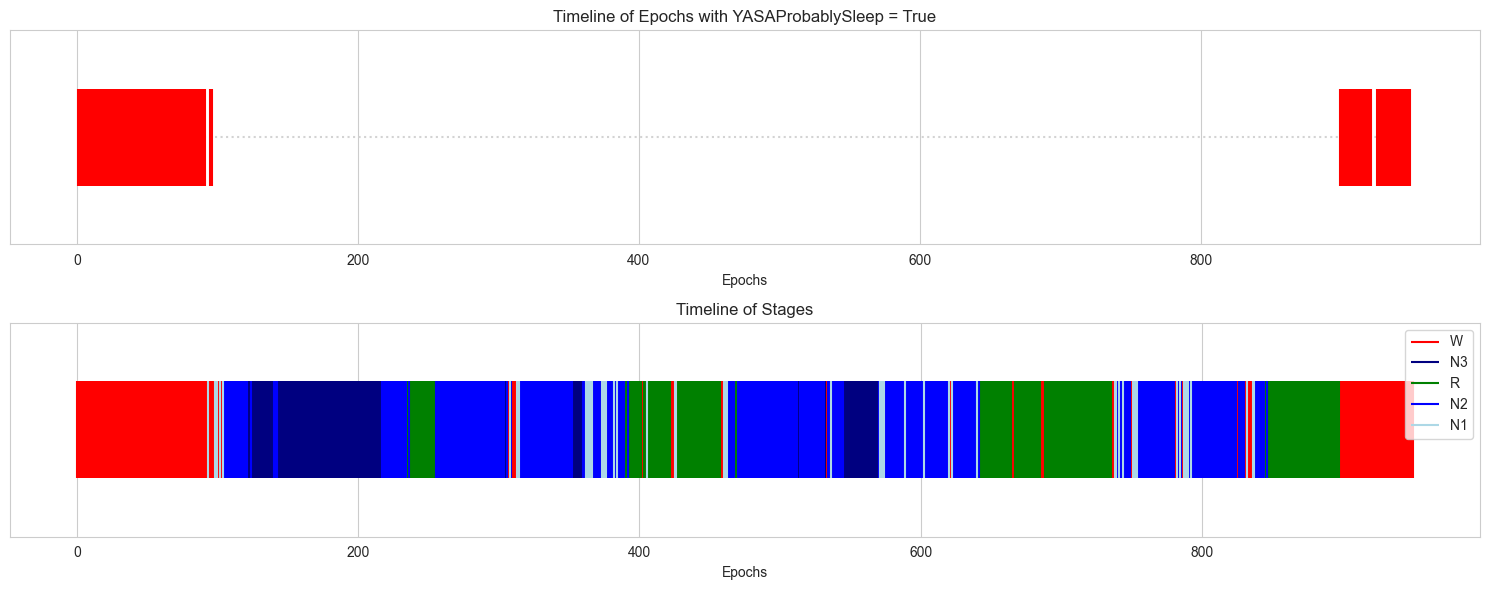

In [648]:
import matplotlib.pyplot as plt
plt.clf()

epochs = len(df_probably_awake)

probably_awake_epochs = df_probably_awake[df_probably_awake['YASAProbablyAwake'] == True]

# Plot the horizontal timeline
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.hlines(1, 0, epochs, colors='lightgray', linestyles='dotted')
plt.eventplot(probably_awake_epochs.index, orientation='horizontal', colors='red')
plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Epochs with YASAProbablySleep = True')

# Plot Stage
plt.subplot(2, 1, 2)
stage_color_map = {
    'W': 'red',
    'N3': 'navy',
    'R': 'green',
    'N2': 'blue',
    'N1': 'lightblue'
}

for stage, color in stage_color_map.items():
    stage_epochs = df_probably_awake[df_probably_awake['Stage'] == stage]
    plt.eventplot(stage_epochs.index, orientation='horizontal', colors=[color], label=stage)

plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Stages')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Manual waking scoring

In [696]:
df_definitely_awake = wakings.get_definitely_awake(epochs_with_yasa_features, ha_events, waking_start_time_tz, waking_end_time_tz)
df_definitely_awake

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,EventTimes,ManualStage,DefinitelyAwake
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,55.290474,4.345698,0.009705,-0.817971,-0.825423,0.000000,0.000000,[],None,False
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,53.044174,62.117203,0.007471,-0.817738,-0.831929,0.008333,0.001053,[],None,False
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,44.263306,57.976131,0.026561,-0.809946,-0.797026,0.016667,0.002105,[],None,False
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,34.999359,43.481384,0.103029,-0.794672,-0.668199,0.025000,0.003158,[],None,False
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,27.776756,42.966190,0.015595,-0.790862,-0.659620,0.033333,0.004211,[],None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,0.357482,-0.042598,0.144683,-0.437334,-0.217451,7.883333,0.995789,[],None,False
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,0.286071,-0.042969,0.109254,-0.450300,-0.206426,7.891667,0.996842,[],None,False
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,0.210416,0.036510,0.008459,-0.470806,-0.331214,7.900000,0.997895,[],None,False


In [700]:
df_definitely_awake['DefinitelyAwake'].value_counts()

DefinitelyAwake
False    950
True       1
Name: count, dtype: int64

In [701]:
epochs_manually_scored_awake = df_definitely_awake.loc[df_definitely_awake['ManualStage'] == 'W']
epochs_manually_scored_awake

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,EventTimes,ManualStage,DefinitelyAwake
epoch,,,,,,,,,,,,,,,,,,,,,
942,W,0.998902,942,2024-07-16 06:24:29.966742039+01:00,F8-M1,W,0.998902,W,0.997494,W,...,0.690405,0.946552,0.007366,-0.445309,-0.506644,7.85,0.991579,[2024-07-16 06:24:30.207000+01:00],W,True


In [702]:
epochs_awake_but_yasa_scored_not_awake = df_definitely_awake.loc[(df_definitely_awake['ManualStage'] == 'W') & (df_definitely_awake['Stage'] != 'W')]
epochs_awake_but_yasa_scored_not_awake

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,EventTimes,ManualStage,DefinitelyAwake
epoch,,,,,,,,,,,,,,,,,,,,,


## Combine probably and definitely awake

In [659]:
df_combined_awake = df_probably_awake.copy()
df_combined_awake['DefinitelyAwake'] = df_definitely_awake['DefinitelyAwake']
df_combined_awake['ProbablyAwake'] = (df_combined_awake['DefinitelyAwake'] == True) | (df_combined_awake['YASAProbablyAwake'] == True)
df_combined_awake

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_std_c7min_norm,O2-M1_eeg_std_p2min_norm,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,55.290474,4.345698,0.009705,-0.817971,-0.825423,0.000000,0.000000,False,False,False
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,53.044174,62.117203,0.007471,-0.817738,-0.831929,0.008333,0.001053,True,False,True
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,44.263306,57.976131,0.026561,-0.809946,-0.797026,0.016667,0.002105,True,False,True
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,34.999359,43.481384,0.103029,-0.794672,-0.668199,0.025000,0.003158,True,False,True
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,27.776756,42.966190,0.015595,-0.790862,-0.659620,0.033333,0.004211,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,0.357482,-0.042598,0.144683,-0.437334,-0.217451,7.883333,0.995789,True,False,True
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,0.286071,-0.042969,0.109254,-0.450300,-0.206426,7.891667,0.996842,True,False,True
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,0.210416,0.036510,0.008459,-0.470806,-0.331214,7.900000,0.997895,True,False,True


## Epochs that are probably sleep
To train a model need both epochs confident am awake, and asleep.

Heuristic here will be: it's sleep unless there's any hint am awake.

Hints am awake: YASA scoring it (and confidence >= 75%), manual scoring it, +/- two minutes either side of those.

In [703]:
import sleep
df_asleep = sleep.probably_asleep(df_combined_awake)


<Figure size 640x480 with 0 Axes>

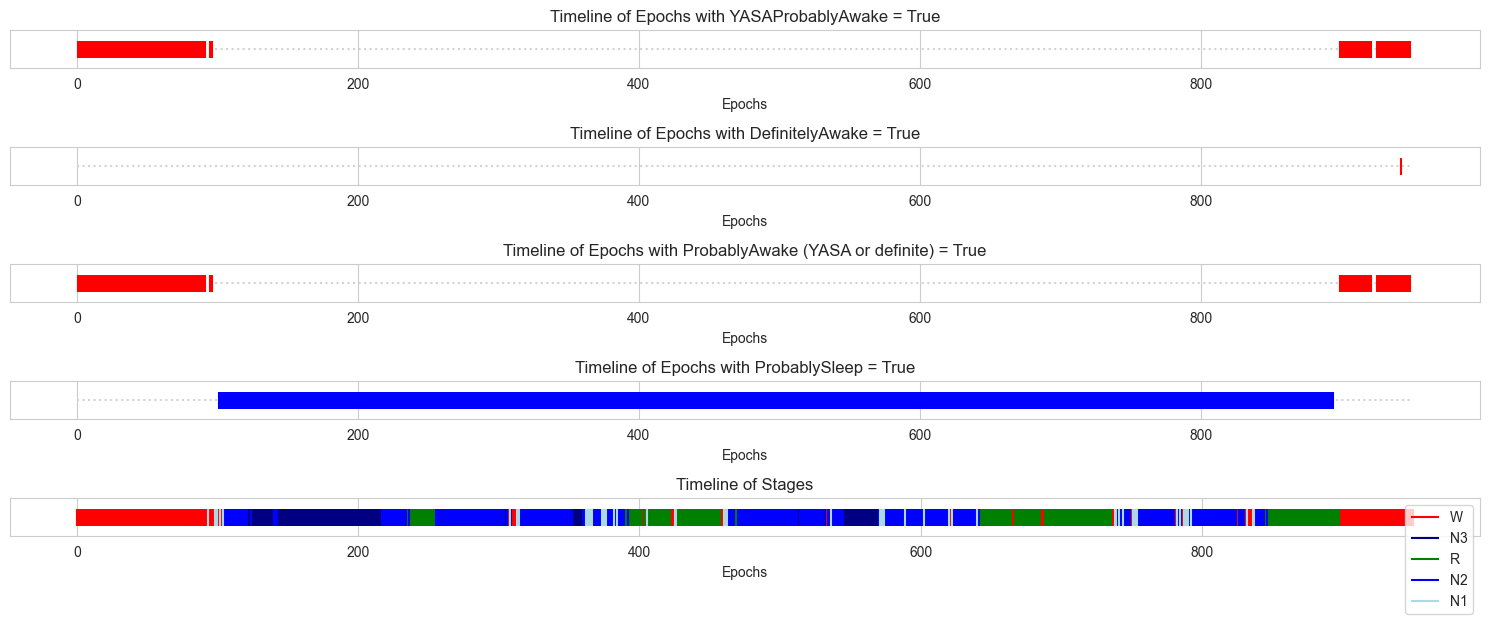

In [704]:
import matplotlib.pyplot as plt
plt.clf()

epochs = len(df_asleep)

definitely_sleep_epochs = df_asleep[df_asleep['ProbablySleep'] == True]
definitely_awake_epochs = df_asleep[df_asleep['DefinitelyAwake'] == True]
probably_awake_epochs = df_asleep[df_asleep['ProbablyAwake'] == True]
yasa_probably_awake_epochs = df_asleep[df_asleep['YASAProbablyAwake'] == True]

# Plot the horizontal timeline
plt.figure(figsize=(15, 6))

num_plots = 5
plot_idx = 1

plt.subplot(num_plots, 1, plot_idx)
plot_idx += 1
plt.hlines(1, 0, epochs, colors='lightgray', linestyles='dotted')
plt.eventplot(yasa_probably_awake_epochs.index, orientation='horizontal', colors='red')
plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Epochs with YASAProbablyAwake = True')

plt.subplot(num_plots, 1, plot_idx)
plot_idx += 1
plt.hlines(1, 0, epochs, colors='lightgray', linestyles='dotted')
plt.eventplot(definitely_awake_epochs.index, orientation='horizontal', colors='red')
plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Epochs with DefinitelyAwake = True')

# Plot ProbablyAwake
plt.subplot(num_plots, 1, plot_idx)
plot_idx += 1
plt.hlines(1, 0, epochs, colors='lightgray', linestyles='dotted')
plt.eventplot(probably_awake_epochs.index, orientation='horizontal', colors='red')
plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Epochs with ProbablyAwake (YASA or definite) = True')

plt.subplot(num_plots, 1, plot_idx)
plot_idx += 1
plt.hlines(1, 0, epochs, colors='lightgray', linestyles='dotted')
plt.eventplot(definitely_sleep_epochs.index, orientation='horizontal', colors='blue')
plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Epochs with ProbablySleep = True')

# Plot Stage
plt.subplot(num_plots, 1, plot_idx)
plot_idx += 1
stage_color_map = {
    'W': 'red',
    'N3': 'navy',
    'R': 'green',
    'N2': 'blue',
    'N1': 'lightblue'
}

for stage, color in stage_color_map.items():
    stage_epochs = df_asleep[df_asleep['Stage'] == stage]
    plt.eventplot(stage_epochs.index, orientation='horizontal', colors=[color], label=stage)

plt.xlabel('Epochs')
plt.yticks([])
plt.title('Timeline of Stages')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [662]:
impossible_rows = df_asleep[(df_asleep['ProbablySleep'] == True) & (df_asleep['DefinitelyAwake'] == True)]
assert impossible_rows.empty, "There are epochs that are both definitely awake and probably asleep"

## More features

In [ ]:
import numpy as np

# Assuming `epochs` is a list of dictionaries with 'time' and 'amplitude' keys
# Example: epochs = [{'time': time_array, 'amplitude': amplitude_array}, ...]

def compute_auc_for_epochs(epochs):
    auc_results = []
    for epoch in epochs:
        time = epoch['time']
        amplitude = epoch['amplitude']

        # Step 1: Take the absolute value of the amplitude
        amplitude_abs = np.abs(amplitude)

        # Step 2: Compute the area under the curve using the trapezoidal rule
        total_auc = np.trapz(amplitude_abs, time)

        # Store the result
        auc_results.append(total_auc)
        print("Total Area Under the Curve (Absolute):", total_auc)

    return auc_results

# Example usage
# epochs = [{'time': np.array([...]), 'amplitude': np.array([...])}, ...]
# auc_results = compute_auc_for_epochs(epochs)

In [ ]:
df

## Save feature-filled DF

In [663]:
output_csv_file = input_file_without_ext + ".with_features.csv"
df_asleep.to_csv(output_csv_file, index=False)


    ## Finding most useful features for wake

In [664]:
final_df = df_asleep.copy()
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 950
Columns: 211 entries, Stage to ProbablySleep
dtypes: bool(4), datetime64[ns, Europe/London](1), float32(192), float64(4), int32(3), int64(2), object(5)
memory usage: 857.0+ KB


In [665]:
def create_correlation_df(df, target_col):
    columns_to_drop = [col for col in df.columns if 'Confidence' in col]
    columns_to_drop += ["StageInt"]

    feature_columns = df.drop(columns=columns_to_drop).select_dtypes(include=['float32', 'float64', 'int32', 'int64']).columns
    
    correlation_with_is_deep = df[feature_columns].corrwith(df[target_col])
    
    # Sort the absolute correlation values in descending order
    sorted_abs_correlation = correlation_with_is_deep.abs().sort_values(ascending=False)
    
    # Calculate the mean of each feature column for ProbablyAwake = 1
    mean_awake = df[df['ProbablyAwake'] == 1][feature_columns].mean()
    
    # Calculate the mean of each feature column for ProbablyAwake = 0
    mean_not_awake = df[df['ProbablyAwake'] == 0][feature_columns].mean()
    
    # Calculate the mean of each feature column for Stage = 'N3'
    mean_n3 = df[df['Stage'] == 'N3'][feature_columns].mean()
    
    # Calculate the mean of each feature column for Stage = 'R'
    mean_r = df[df['Stage'] == 'R'][feature_columns].mean()
    
    # Calculate the mean of each feature column for Stage = 'N2'
    mean_n2 = df[df['Stage'] == 'N2'][feature_columns].mean()
    
    # Combine both sorted correlation values and means into a single DataFrame
    combined_correlation_df = pd.DataFrame({
        'Correlation': correlation_with_is_deep,
        'Absolute Correlation': sorted_abs_correlation,
        'Mean (ProbablyAwake=1)': mean_awake,
        'Mean (ProbablyAwake=0)': mean_not_awake,
        'Mean (Stage=N3)': mean_n3,
        'Mean (Stage=R)': mean_r,
        'Mean (Stage=N2)': mean_n2
    })
    
    # Display the combined DataFrame sorted by absolute correlation values
    combined_correlation_df = combined_correlation_df.sort_values(by='Absolute Correlation', ascending=False)
    return combined_correlation_df

corr_df = create_correlation_df(final_df, 'ProbablyAwake')
corr_df

,Correlation,Absolute Correlation,Mean (ProbablyAwake=1),Mean (ProbablyAwake=0),Mean (Stage=N3),Mean (Stage=R),Mean (Stage=N2)
O2-M1_eeg_beta_c7min_norm,0.781465,0.781465,0.637309,-0.032331,-0.243362,0.137443,-0.086657
O2-M1_eeg_at_c7min_norm,0.753363,0.753363,0.595456,-0.016446,-0.159679,0.099846,-0.054986
T4-M1_eeg_petrosian_c7min_norm,0.729295,0.729295,0.559765,-0.020629,-0.276215,0.195417,-0.092956
O2-M1_eeg_fdelta_c7min_norm,-0.727939,0.727939,-0.541184,0.058370,-0.072084,-0.070656,0.203202
O2-M1_eeg_petrosian_c7min_norm,0.720837,0.720837,0.597315,-0.007905,-0.240519,0.190765,-0.075664
...,...,...,...,...,...,...,...
T4-M1_eeg_skew_p2min_norm,0.009769,0.009769,-0.004817,-0.012956,0.020798,-0.173092,0.115875
O2-M1_eeg_ds,-0.003187,0.003187,56.085846,58.536858,132.966049,13.273681,22.587872
T4-M1_eeg_skew,0.001708,0.001708,0.285720,0.279365,0.368098,-0.117387,0.664242
F8-M1_eeg_abspow,-0.001172,0.001172,1320.257080,1408.772949,623.614868,72.226753,125.939911


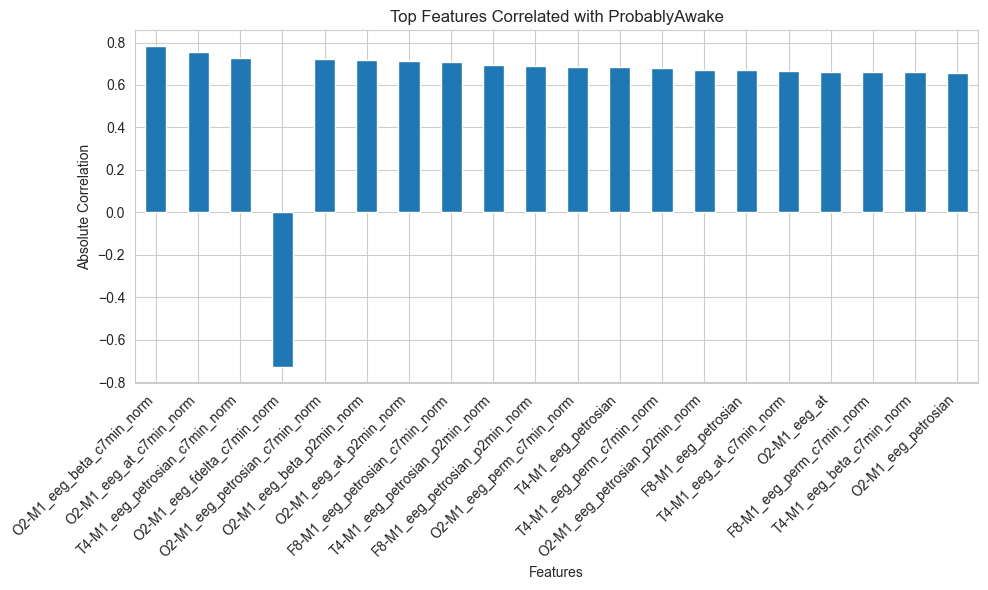

In [666]:
import pandas as pd
import matplotlib.pyplot as plt

top_features = corr_df['Correlation'].head(20)

# Plot the correlation values of these top 10 features
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top Features Correlated with ProbablyAwake')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Finding most useful features for deep

In [667]:
deep_df = final_df.copy()
deep_df['IsDeep'] = (deep_df['Stage'] == 'N3').astype(int)
deep_df

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,O2-M1_eeg_theta,O2-M1_eeg_theta_c7min_norm,O2-M1_eeg_theta_p2min_norm,O2-M1_time_hour,O2-M1_time_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake,ProbablySleep,IsDeep
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,0.009705,-0.817971,-0.825423,0.000000,0.000000,False,False,False,False,0
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,0.007471,-0.817738,-0.831929,0.008333,0.001053,True,False,True,False,0
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,0.026561,-0.809946,-0.797026,0.016667,0.002105,True,False,True,False,0
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,0.103029,-0.794672,-0.668199,0.025000,0.003158,True,False,True,False,0
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,0.015595,-0.790862,-0.659620,0.033333,0.004211,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,0.144683,-0.437334,-0.217451,7.883333,0.995789,True,False,True,False,0
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,0.109254,-0.450300,-0.206426,7.891667,0.996842,True,False,True,False,0
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,0.008459,-0.470806,-0.331214,7.900000,0.997895,True,False,True,False,0


In [668]:
corr_dr = create_correlation_df(deep_df, 'IsDeep')


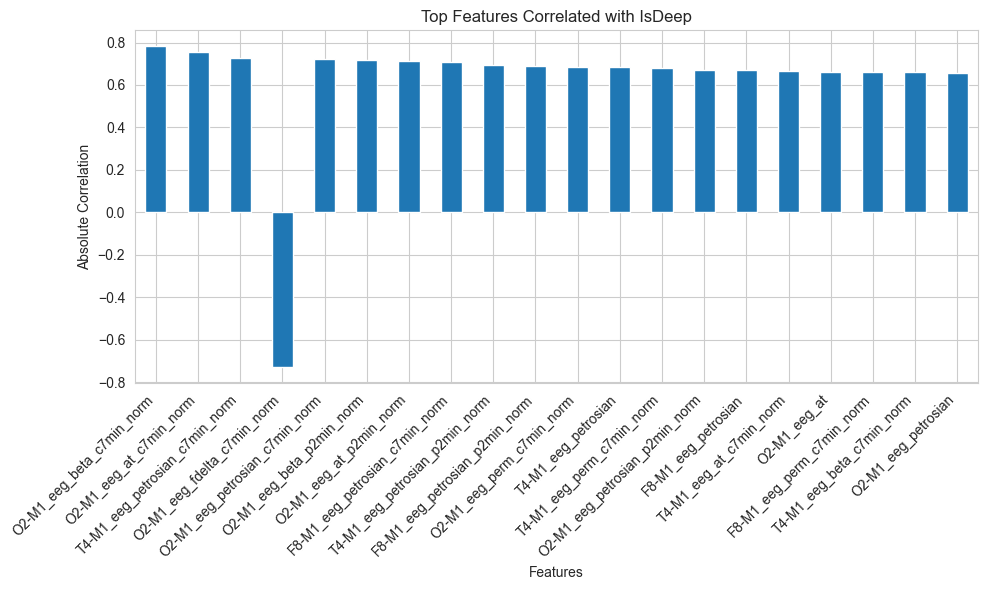

In [669]:
import pandas as pd
import matplotlib.pyplot as plt

top_features = corr_df['Correlation'].head(20)

# Plot the correlation values of these top 10 features
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top Features Correlated with IsDeep')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Preparing data for training model to predict wake vs sleep
Our features have been extracted, just tidying up the data now.

In [607]:
df_asleep

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,T4-M1_Stage,T4-M1_Confidence,O2-M1_Stage,...,eeg_std,eeg_std_c7min_norm,eeg_std_p2min_norm,eeg_theta,eeg_theta_c7min_norm,eeg_theta_p2min_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake,ProbablySleep
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,0.999774,0,2024-07-15 22:33:29.966742039+01:00,O2-M1,W,0.999593,W,0.999332,W,...,9651.925781,19.653381,57.227287,0.004928,-0.539559,-0.806887,False,False,False,False
1,W,0.999920,1,2024-07-15 22:33:59.966742039+01:00,O2-M1,W,0.995669,W,0.999821,W,...,142.510818,14.710793,28.974810,0.085236,-0.527687,-0.533612,True,False,True,False
2,W,0.999921,2,2024-07-15 22:34:29.966742039+01:00,F8-M1,W,0.999921,W,0.999814,W,...,71.113892,11.337958,19.415903,0.073423,-0.519930,-0.469319,True,False,True,False
3,W,0.999902,3,2024-07-15 22:34:59.966742039+01:00,F8-M1,W,0.999902,W,0.999746,W,...,33.865833,8.846552,14.581119,0.110291,-0.511328,-0.374444,True,False,True,False
4,W,0.999951,4,2024-07-15 22:35:29.966742039+01:00,T4-M1,W,0.999525,W,0.999951,W,...,378.914337,6.891988,0.806057,0.010568,-0.512120,-0.364848,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,W,0.978060,946,2024-07-16 06:26:29.966742039+01:00,T4-M1,W,0.955068,W,0.978060,W,...,17.673656,0.116397,-0.007994,0.085978,-0.476174,-0.254141,True,False,True,False
947,W,0.983314,947,2024-07-16 06:26:59.966742039+01:00,T4-M1,W,0.969879,W,0.983314,W,...,21.981144,0.098445,-0.001615,0.064235,-0.474588,-0.303310,True,False,True,False
948,W,0.992654,948,2024-07-16 06:27:29.966742039+01:00,T4-M1,W,0.978739,W,0.992654,W,...,81.038345,0.084038,0.079479,0.029754,-0.478289,-0.410592,True,False,True,False


In [604]:
final_df = df_asleep.copy()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 950
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype                        
---  ------                    --------------  -----                        
 0   Stage                     951 non-null    object                       
 1   Confidence                951 non-null    float64                      
 2   Epoch                     951 non-null    int64                        
 3   Timestamp                 951 non-null    datetime64[ns, Europe/London]
 4   Source                    951 non-null    object                       
 5   F8-M1_Stage               951 non-null    object                       
 6   F8-M1_Confidence          951 non-null    float64                      
 7   T4-M1_Stage               951 non-null    object                       
 8   T4-M1_Confidence          951 non-null    float64                      
 9   O2-M1_Stage               951 non-null    object

In [605]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.columns_to_keep = [col for col in X.columns if col.startswith("eeg_") or col.startswith("Definitely")]
        return self

    def transform(self, X):
        return X[self.columns_to_keep]

class BooleanConverter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        boolean_columns = X.select_dtypes(include=['bool']).columns
        X[boolean_columns] = X[boolean_columns].astype(int)
        return X

class IndexPreserver(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        self.index = X.index
        return X

    def inverse_transform(self, X):
        X.index = self.index
        return X


class RowFilterAndLabelCreator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Filter rows where either DefinitelyAwake or ProbablySleep is True
        X = X[(X['DefinitelyAwake'] == 1) | (X['ProbablySleep'] == 1)]

        # Combine DefinitelyAwake and ProbablySleep into a single label column
        X['Awake'] = X['DefinitelyAwake']

        return X

class ColumnDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop the original ProbablyAwake and ProbablySleep columns
        X = X.drop(columns=['ProbablyAwake', 'ProbablySleep'])

        return X


# Create the pipeline
pipeline = Pipeline([
    ('selector', DataFrameSelector()),
    ('bool_converter', BooleanConverter()),
    ('row_filter_and_label_creator', RowFilterAndLabelCreator()),
    ('dropper', ColumnDropper()),
    ('index_preserver', IndexPreserver())
])

prediction_pipeline = Pipeline([
    ('selector', DataFrameSelector()),
    ('bool_converter', BooleanConverter()),
    ('dropper', ColumnDropper()),
    ('index_preserver', IndexPreserver())
])

# Example usage
prepared_df = pipeline.fit_transform(final_df)
prepared_df = pipeline.named_steps['index_preserver'].inverse_transform(prepared_df)

C:\Users\graha\AppData\Local\Temp\ipykernel_25724\1686124414.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[boolean_columns] = X[boolean_columns].astype(int)


KeyError: 'ProbablySleep'

In [ ]:
# Split features and labels
X = prepared_df.drop(columns=['Awake'])
y = prepared_df['Awake']

In [435]:
X

,eeg_abspow,eeg_abspow_c7min_norm,eeg_abspow_p2min_norm,eeg_alpha,eeg_alpha_c7min_norm,eeg_alpha_p2min_norm,eeg_at,eeg_at_c7min_norm,eeg_at_p2min_norm,eeg_beta,...,eeg_sigma_p2min_norm,eeg_skew,eeg_skew_c7min_norm,eeg_skew_p2min_norm,eeg_std,eeg_std_c7min_norm,eeg_std_p2min_norm,eeg_theta,eeg_theta_c7min_norm,eeg_theta_p2min_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,4.990979e+03,0.278966,0.631299,0.012689,-0.361939,-0.410215,0.124788,-0.619938,-0.587271,0.004270,...,-0.451120,-2.179382,-0.139343,-0.702498,1462.481689,1.755778,3.784707,0.101685,0.083300,0.074805
1,2.559416e+03,0.270879,0.469526,0.014201,-0.354200,-0.402962,0.245841,-0.607524,-0.511765,0.008168,...,-0.445075,3.821446,-0.117966,0.205229,890.584595,1.455913,3.033308,0.057765,0.081351,-0.082397
2,5.710748e+02,0.260549,0.327412,0.035574,-0.341987,-0.332181,0.213857,-0.596904,-0.499896,0.019323,...,-0.397095,-3.007329,-0.182080,-0.180841,25.143320,1.144473,2.024789,0.166347,0.095248,0.124297
3,2.082173e+03,0.257309,0.306621,0.019505,-0.337898,-0.335339,0.226276,-0.587734,-0.490089,0.014485,...,-0.389600,0.062750,-0.213452,-0.141675,76.791161,0.918838,1.554459,0.086199,0.086818,0.084210
4,1.001826e+03,0.253526,0.173921,0.027817,-0.333857,-0.299050,0.195271,-0.580007,-0.468107,0.022342,...,-0.359382,-0.534649,-0.257160,-0.017278,60.117519,0.738975,0.633196,0.142451,0.081911,0.157166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3.113065e+02,4639.487793,0.025944,0.043802,-0.020575,0.077280,1.467819,0.497832,0.917237,0.042016,...,0.000061,-0.779873,-0.088139,-0.113638,482.999573,33.163811,0.414488,0.029842,-0.428259,-0.329058
1210,1.001931e+06,5814.839844,33.353519,0.000777,-0.132334,-0.269557,0.167818,0.304457,0.533147,0.000340,...,-0.264102,-0.446020,-0.100278,-0.120351,24057.628906,41.459320,16.204884,0.004628,-0.473204,-0.506672
1211,3.957363e+08,7320.162598,13197.607422,0.000447,-0.222835,-0.393715,0.110616,0.130212,0.068645,0.000237,...,-0.374858,0.146771,-0.092800,-0.069139,40415.796875,48.751488,42.729042,0.004041,-0.505216,-0.557830


In [436]:
X

,eeg_abspow,eeg_abspow_c7min_norm,eeg_abspow_p2min_norm,eeg_alpha,eeg_alpha_c7min_norm,eeg_alpha_p2min_norm,eeg_at,eeg_at_c7min_norm,eeg_at_p2min_norm,eeg_beta,...,eeg_sigma_p2min_norm,eeg_skew,eeg_skew_c7min_norm,eeg_skew_p2min_norm,eeg_std,eeg_std_c7min_norm,eeg_std_p2min_norm,eeg_theta,eeg_theta_c7min_norm,eeg_theta_p2min_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,4.990979e+03,0.278966,0.631299,0.012689,-0.361939,-0.410215,0.124788,-0.619938,-0.587271,0.004270,...,-0.451120,-2.179382,-0.139343,-0.702498,1462.481689,1.755778,3.784707,0.101685,0.083300,0.074805
1,2.559416e+03,0.270879,0.469526,0.014201,-0.354200,-0.402962,0.245841,-0.607524,-0.511765,0.008168,...,-0.445075,3.821446,-0.117966,0.205229,890.584595,1.455913,3.033308,0.057765,0.081351,-0.082397
2,5.710748e+02,0.260549,0.327412,0.035574,-0.341987,-0.332181,0.213857,-0.596904,-0.499896,0.019323,...,-0.397095,-3.007329,-0.182080,-0.180841,25.143320,1.144473,2.024789,0.166347,0.095248,0.124297
3,2.082173e+03,0.257309,0.306621,0.019505,-0.337898,-0.335339,0.226276,-0.587734,-0.490089,0.014485,...,-0.389600,0.062750,-0.213452,-0.141675,76.791161,0.918838,1.554459,0.086199,0.086818,0.084210
4,1.001826e+03,0.253526,0.173921,0.027817,-0.333857,-0.299050,0.195271,-0.580007,-0.468107,0.022342,...,-0.359382,-0.534649,-0.257160,-0.017278,60.117519,0.738975,0.633196,0.142451,0.081911,0.157166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,3.113065e+02,4639.487793,0.025944,0.043802,-0.020575,0.077280,1.467819,0.497832,0.917237,0.042016,...,0.000061,-0.779873,-0.088139,-0.113638,482.999573,33.163811,0.414488,0.029842,-0.428259,-0.329058
1210,1.001931e+06,5814.839844,33.353519,0.000777,-0.132334,-0.269557,0.167818,0.304457,0.533147,0.000340,...,-0.264102,-0.446020,-0.100278,-0.120351,24057.628906,41.459320,16.204884,0.004628,-0.473204,-0.506672
1211,3.957363e+08,7320.162598,13197.607422,0.000447,-0.222835,-0.393715,0.110616,0.130212,0.068645,0.000237,...,-0.374858,0.146771,-0.092800,-0.069139,40415.796875,48.751488,42.729042,0.004041,-0.505216,-0.557830


In [437]:
y

epoch
0       1
1       1
2       1
3       1
4       1
       ..
1209    1
1210    1
1211    1
1212    1
1213    1
Name: Awake, Length: 854, dtype: int32

In [438]:
## Training LightGDM model to predict wake vs sleep

In [439]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [440]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [910, 854]

In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data])

In [441]:
# Predict on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9824561403508771


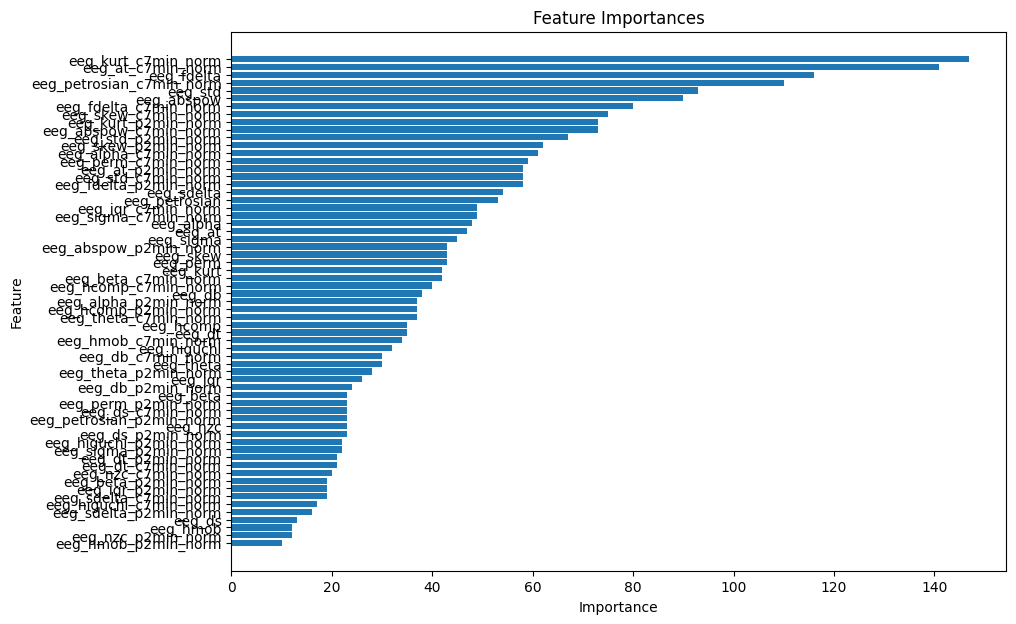

In [442]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming the model is already trained and named `bst`

# Get feature importances
importance = bst.feature_importance()
feature_names = bst.feature_name()

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 7))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [443]:
importances_df

,Feature,Importance
37,eeg_kurt_c7min_norm,147
7,eeg_at_c7min_norm,141
21,eeg_fdelta,116
46,eeg_petrosian_c7min_norm,110
57,eeg_std,93
...,...,...
50,eeg_sdelta_p2min_norm,16
15,eeg_ds,13
30,eeg_hmob,12
41,eeg_nzc_p2min_norm,12


## Run model against all epochs

In [444]:
final_df

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,Fpz-M1_Stage,Fpz-M1_Confidence,F4-M1_Stage,...,eeg_std,eeg_std_c7min_norm,eeg_std_p2min_norm,eeg_theta,eeg_theta_c7min_norm,eeg_theta_p2min_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake,ProbablySleep
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,1.000000,0,2024-08-26 20:56:10.722846031+01:00,F8-M1,W,1.000000,W,0.995489,W,...,1462.481689,1.755778,3.784707,0.101685,0.083300,0.074805,False,True,True,False
1,W,0.998892,1,2024-08-26 20:56:40.722846031+01:00,F8-M1,W,0.998892,W,0.996546,W,...,890.584595,1.455913,3.033308,0.057765,0.081351,-0.082397,True,True,True,False
2,W,0.993411,2,2024-08-26 20:57:10.722846031+01:00,Fpz-M1,W,0.987098,W,0.993411,W,...,25.143320,1.144473,2.024789,0.166347,0.095248,0.124297,True,True,True,False
3,W,0.998980,3,2024-08-26 20:57:40.722846031+01:00,F4-M1,W,0.998636,W,0.998790,W,...,76.791161,0.918838,1.554459,0.086199,0.086818,0.084210,True,True,True,False
4,W,0.998519,4,2024-08-26 20:58:10.722846031+01:00,Fpz-M1,W,0.996067,W,0.998519,W,...,60.117519,0.738975,0.633196,0.142451,0.081911,0.157166,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,W,0.965710,1209,2024-08-27 07:00:40.722846031+01:00,F8-M1,W,0.965710,W,0.939456,W,...,482.999573,33.163811,0.414488,0.029842,-0.428259,-0.329058,True,True,True,False
1210,W,0.997559,1210,2024-08-27 07:01:10.722846031+01:00,F8-M1,W,0.997559,W,0.992666,W,...,24057.628906,41.459320,16.204884,0.004628,-0.473204,-0.506672,True,True,True,False
1211,W,0.998766,1211,2024-08-27 07:01:40.722846031+01:00,F8-M1,W,0.998766,W,0.997844,W,...,40415.796875,48.751488,42.729042,0.004041,-0.505216,-0.557830,True,True,True,False


In [445]:
# Use on all epochs
fd2 = final_df.copy()

prepared_df = prediction_pipeline.fit_transform(fd2)
prepared_df = prediction_pipeline.named_steps['index_preserver'].inverse_transform(prepared_df)

X = prepared_df
y_pred = bst.predict(X, num_iteration=bst.best_iteration)
predictions_df = pd.DataFrame(y_pred, index=prepared_df.index, columns=['PredictedAwake'])
fd2 = fd2.merge(predictions_df, left_index=True, right_index=True, how='left')
fd2['PredictedAwakeBinary'] = fd2['PredictedAwake'].apply(lambda x: 1 if x > 0.5 else 0)
fd2

C:\Users\graha\AppData\Local\Temp\ipykernel_25724\1686124414.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[boolean_columns] = X[boolean_columns].astype(int)


KeyError: "['ProbablyAwake', 'ProbablySleep'] not found in axis"

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
# Plot the histogram of the 'PredictedAwake' column
fd2['PredictedAwake'].hist()

# Add labels and title
plt.xlabel('PredictedAwake')
plt.ylabel('Frequency')
plt.title('Histogram of PredictedAwake')

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(fd2['ProbablyAwake'], fd2['PredictedAwakeBinary'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Awake', 'Awake'], yticklabels=['Not Awake', 'Awake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix between PredictedAwake and ProbablyAwake')
plt.show()

In [446]:
output_csv_file = input_file_without_ext + ".with_predictions.csv"
fd2.to_csv(output_csv_file, index=False)


In [447]:
fd2

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,Fpz-M1_Stage,Fpz-M1_Confidence,F4-M1_Stage,...,eeg_std,eeg_std_c7min_norm,eeg_std_p2min_norm,eeg_theta,eeg_theta_c7min_norm,eeg_theta_p2min_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake,ProbablySleep
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,1.000000,0,2024-08-26 20:56:10.722846031+01:00,F8-M1,W,1.000000,W,0.995489,W,...,1462.481689,1.755778,3.784707,0.101685,0.083300,0.074805,False,True,True,False
1,W,0.998892,1,2024-08-26 20:56:40.722846031+01:00,F8-M1,W,0.998892,W,0.996546,W,...,890.584595,1.455913,3.033308,0.057765,0.081351,-0.082397,True,True,True,False
2,W,0.993411,2,2024-08-26 20:57:10.722846031+01:00,Fpz-M1,W,0.987098,W,0.993411,W,...,25.143320,1.144473,2.024789,0.166347,0.095248,0.124297,True,True,True,False
3,W,0.998980,3,2024-08-26 20:57:40.722846031+01:00,F4-M1,W,0.998636,W,0.998790,W,...,76.791161,0.918838,1.554459,0.086199,0.086818,0.084210,True,True,True,False
4,W,0.998519,4,2024-08-26 20:58:10.722846031+01:00,Fpz-M1,W,0.996067,W,0.998519,W,...,60.117519,0.738975,0.633196,0.142451,0.081911,0.157166,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,W,0.965710,1209,2024-08-27 07:00:40.722846031+01:00,F8-M1,W,0.965710,W,0.939456,W,...,482.999573,33.163811,0.414488,0.029842,-0.428259,-0.329058,True,True,True,False
1210,W,0.997559,1210,2024-08-27 07:01:10.722846031+01:00,F8-M1,W,0.997559,W,0.992666,W,...,24057.628906,41.459320,16.204884,0.004628,-0.473204,-0.506672,True,True,True,False
1211,W,0.998766,1211,2024-08-27 07:01:40.722846031+01:00,F8-M1,W,0.998766,W,0.997844,W,...,40415.796875,48.751488,42.729042,0.004041,-0.505216,-0.557830,True,True,True,False


In [448]:
yasa_copy

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,Fpz-M1_Stage,Fpz-M1_Confidence,F4-M1_Stage,F4-M1_Confidence,StageInt
0,W,1.000000,0,2024-08-26 20:56:10.722846031+01:00,F8-M1,W,1.000000,W,0.995489,W,0.993066,0
1,W,0.998892,1,2024-08-26 20:56:40.722846031+01:00,F8-M1,W,0.998892,W,0.996546,W,0.998089,0
2,W,0.993411,2,2024-08-26 20:57:10.722846031+01:00,Fpz-M1,W,0.987098,W,0.993411,W,0.976332,0
3,W,0.998980,3,2024-08-26 20:57:40.722846031+01:00,F4-M1,W,0.998636,W,0.998790,W,0.998980,0
4,W,0.998519,4,2024-08-26 20:58:10.722846031+01:00,Fpz-M1,W,0.996067,W,0.998519,W,0.996514,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,W,0.965710,1209,2024-08-27 07:00:40.722846031+01:00,F8-M1,W,0.965710,W,0.939456,W,0.873434,0
1210,W,0.997559,1210,2024-08-27 07:01:10.722846031+01:00,F8-M1,W,0.997559,W,0.992666,W,0.976822,0
1211,W,0.998766,1211,2024-08-27 07:01:40.722846031+01:00,F8-M1,W,0.998766,W,0.997844,W,0.996611,0
1212,W,0.997894,1212,2024-08-27 07:02:10.722846031+01:00,Fpz-M1,W,0.995466,W,0.997894,W,0.997249,0


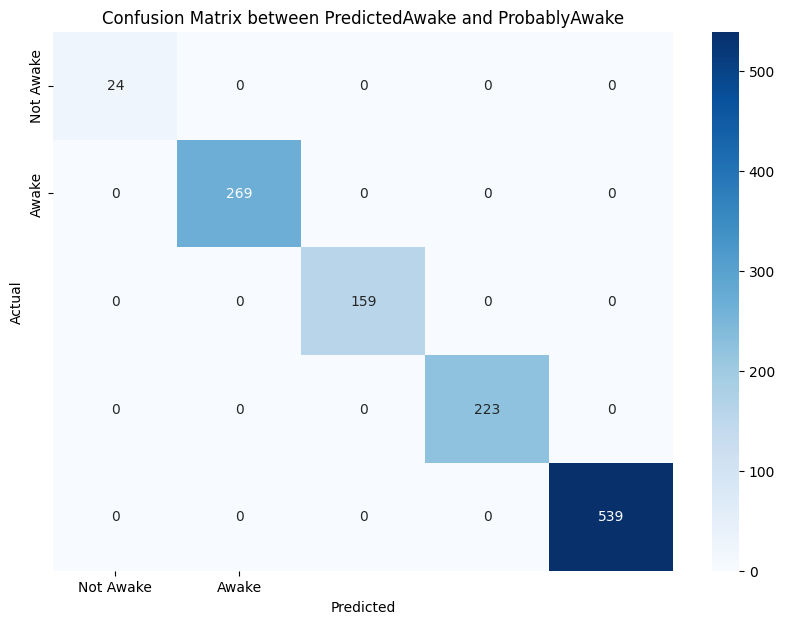

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(yasa_copy['Stage'], fd2['Stage'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Awake', 'Awake'], yticklabels=['Not Awake', 'Awake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix between PredictedAwake and ProbablyAwake')
plt.show()

In [450]:
yasa_copy

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,Fpz-M1_Stage,Fpz-M1_Confidence,F4-M1_Stage,F4-M1_Confidence,StageInt
0,W,1.000000,0,2024-08-26 20:56:10.722846031+01:00,F8-M1,W,1.000000,W,0.995489,W,0.993066,0
1,W,0.998892,1,2024-08-26 20:56:40.722846031+01:00,F8-M1,W,0.998892,W,0.996546,W,0.998089,0
2,W,0.993411,2,2024-08-26 20:57:10.722846031+01:00,Fpz-M1,W,0.987098,W,0.993411,W,0.976332,0
3,W,0.998980,3,2024-08-26 20:57:40.722846031+01:00,F4-M1,W,0.998636,W,0.998790,W,0.998980,0
4,W,0.998519,4,2024-08-26 20:58:10.722846031+01:00,Fpz-M1,W,0.996067,W,0.998519,W,0.996514,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,W,0.965710,1209,2024-08-27 07:00:40.722846031+01:00,F8-M1,W,0.965710,W,0.939456,W,0.873434,0
1210,W,0.997559,1210,2024-08-27 07:01:10.722846031+01:00,F8-M1,W,0.997559,W,0.992666,W,0.976822,0
1211,W,0.998766,1211,2024-08-27 07:01:40.722846031+01:00,F8-M1,W,0.998766,W,0.997844,W,0.996611,0
1212,W,0.997894,1212,2024-08-27 07:02:10.722846031+01:00,Fpz-M1,W,0.995466,W,0.997894,W,0.997249,0


In [451]:
fd2

,Stage,Confidence,Epoch,Timestamp,Source,F8-M1_Stage,F8-M1_Confidence,Fpz-M1_Stage,Fpz-M1_Confidence,F4-M1_Stage,...,eeg_std,eeg_std_c7min_norm,eeg_std_p2min_norm,eeg_theta,eeg_theta_c7min_norm,eeg_theta_p2min_norm,YASAProbablyAwake,DefinitelyAwake,ProbablyAwake,ProbablySleep
epoch,,,,,,,,,,,,,,,,,,,,,
0,W,1.000000,0,2024-08-26 20:56:10.722846031+01:00,F8-M1,W,1.000000,W,0.995489,W,...,1462.481689,1.755778,3.784707,0.101685,0.083300,0.074805,False,True,True,False
1,W,0.998892,1,2024-08-26 20:56:40.722846031+01:00,F8-M1,W,0.998892,W,0.996546,W,...,890.584595,1.455913,3.033308,0.057765,0.081351,-0.082397,True,True,True,False
2,W,0.993411,2,2024-08-26 20:57:10.722846031+01:00,Fpz-M1,W,0.987098,W,0.993411,W,...,25.143320,1.144473,2.024789,0.166347,0.095248,0.124297,True,True,True,False
3,W,0.998980,3,2024-08-26 20:57:40.722846031+01:00,F4-M1,W,0.998636,W,0.998790,W,...,76.791161,0.918838,1.554459,0.086199,0.086818,0.084210,True,True,True,False
4,W,0.998519,4,2024-08-26 20:58:10.722846031+01:00,Fpz-M1,W,0.996067,W,0.998519,W,...,60.117519,0.738975,0.633196,0.142451,0.081911,0.157166,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,W,0.965710,1209,2024-08-27 07:00:40.722846031+01:00,F8-M1,W,0.965710,W,0.939456,W,...,482.999573,33.163811,0.414488,0.029842,-0.428259,-0.329058,True,True,True,False
1210,W,0.997559,1210,2024-08-27 07:01:10.722846031+01:00,F8-M1,W,0.997559,W,0.992666,W,...,24057.628906,41.459320,16.204884,0.004628,-0.473204,-0.506672,True,True,True,False
1211,W,0.998766,1211,2024-08-27 07:01:40.722846031+01:00,F8-M1,W,0.998766,W,0.997844,W,...,40415.796875,48.751488,42.729042,0.004041,-0.505216,-0.557830,True,True,True,False


In [487]:
fd2['eeg_petrosian'].describe()

count    1214.000000
mean        1.006608
std         0.001286
min         1.001048
25%         1.005547
50%         1.006539
75%         1.007882
max         1.009027
Name: eeg_petrosian, dtype: float64